In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [63]:
df = pd.read_csv('consolidated_contracts.csv')

In [64]:
contract_lengths = df['announcement'].str.len()

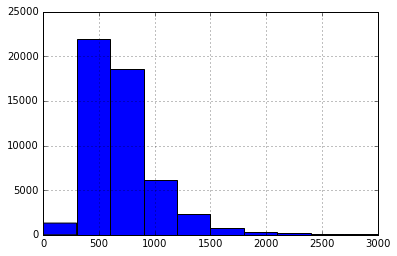

In [65]:
# Setting a range here because there is one extremely high value (40000+) that throws the graph off
contract_lengths.hist(range=[0, 3000], bins=10)

In [66]:
# Find the overly length announcements
# Find announcements that mention "contracting activity" multiple times (indicates multiple entires usually)
suspect_announcements = df[(df['announcement'].str.len() > 2500) & 
                          (df['announcement'].str.count('contracting activity', flags=re.IGNORECASE) > 1)]

In [67]:
print(suspect_announcements)

                     date                                       announcement
27848     August 09, 2006  CONTRACTS NAVY Harris Corp., RF Communications...
27865     August 11, 2006  CONTRACTS AIR FORCE Rockwell Collins Inc., Ced...
27866     August 14, 2006  CONTRACTS AIR FORCE Aerospace Testing Alliance...
27867     August 15, 2006  CONTRACTS ARMY General Dynamics, St. Petersbur...
27868     August 16, 2006  CONTRACTS MISSILE DEFENSE AGENCY Raytheon Miss...
27869     August 18, 2006  CONTRACTS DEFENSE LOGISTICS AGENCY Science App...
27870     August 21, 2006  CONTRACTS DEFENSE INFORMATION SYSTEMS AGENCY (...
27871  September 06, 2006  CONTRACTS ARMY GM GDLS Defense Group L.L.C. (J...
27872  September 06, 2006  Spindler Construction Corp.*, Logan, Utah, was...
27873  September 07, 2006  CONTRACTS DEFENSE LOGISTICS AGENCY Valero Mark...
27874  September 08, 2006  Lear Siegler Logistics International Inc., Gai...
27880  September 11, 2006  GM GDLS Defense Group L.L.C. (Joint Venture), ...

In [68]:
# Export to CSV for manual editing and splitting of long announcements that are probably repeated
suspect_announcements.to_csv('suspect_announcements.csv')

In [69]:
# Re-import CSV with "BREAK" inserted between announcements that are on the same line
updated_entries = pd.read_csv('suspect_announcements_broken_up.csv', index_col='index')

In [70]:
# Update the original data frame with the new, manually edited entries
df.update(updated_entries)

In [71]:
# Make sure the update worked
df['announcement'].str.count('BREAK').sum()

544

In [72]:
# Split upon the occurences of 'BREAK' (this will expand each row into multiple columns that need to be flattened)
df['announcement'] = df['announcement'].str.split('BREAK', expand=False)

In [73]:
grouped = df.groupby(df['date'])

In [78]:
aggregated = grouped.aggregate(lambda x: list(x))

In [81]:
# Concat the lists since some have multiple values while others are empty
aggregated['announcement'] = aggregated['announcement'].apply(
    lambda lists: [item for sublist in lists for item in sublist])

In [82]:
# Each date should not have only one row, while the next column is a list for all releases from that date
print(aggregated['announcement'][0])

['GTE Government Systems Division, Taunton, Massachusetts, was awarded on March19, 1996, a $7,433,603 increment as part of a not-to-exceed $14,867,206modification to a firm fixed price with economic price adjustments contract toprovide Soldier Machine Interface, network planning and engineering,battlefield spectrum management, system administration, data distribution andplanning and map management to the Network Management Tool of the MobileSubscriber Equipment System. Work will be performed in Taunton, Massachusetts,and is expected to be completed by March 31, 2008. Contract funds will notexpire at the end of the current fiscal year. There were 143 bids solicited onFebruary 7, 1984, and two bids received. The contracting activity is the U.S.Army Communications and Electronics Command, Fort Monmouth, New Jersey(DAAB07-86-C-K022).', 'R. P. Richards, Incorporated. Goleta, California, was awarded on March 29,1996, a $6,775,000 fixed price contract for a hospital addition and life safetyup